# Statistical Analysis Pupil Dilation Processing

In this notebook, basic statistical analyses are performed on the cleaned, segmented, and aggregated pupil dilation data for adults.
In particular, the following sections are outlined:
- Loading and subsetting the data
- Main Statistical Analyses
  - Anova to test for higher order effects
  - Check diagnostics
  - Simple means for Emotion
  - Vizualized interaction effect for Dismissing and Preoccupied
- Additional Statistical Analyses
  - Additional Analysis 1: Age in model
  - Additional Analysis 2: Security instead of Preoccupied/Dismissing

## Input<>Output data

#### input
`~data/final/adults_final_data.xlsx`
#### output
`~reports/figures/adults`

### Note
- Only observations (i.e., trials) where at least 85% data is present in both the fixation and the stimulus period are considered for the analysis
- The name of the dependent variable contains information about the analysis time-window (e.g., avg_pd_bc_post1500ms). As a consequence, changing the analysis time window in the preceeding python scripts (i.e., 002_aggregate_to_group_data.py) also changes the name of the dependent variablre in the dataset loaded into R. Therefore, the name of the dependent variable needs to be changed in the Parameter section.


## Packages

In [ ]:
if (!require("ggplot2")) install.packages("ggplot2")
library(ggplot2)

if (!require("sjPlot")) install.packages("sjPlot")
library(sjPlot)

library(readxl)
library(lme4)
library(dplyr)
library(car)
library(lmerTest)
library(sjPlot)
library(sjmisc)


Loading required package: ggplot2

Loading required package: sjPlot

#refugeeswelcome

Loading required package: Matrix


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:dplyr':

    recode



Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step




Create R-environment file for reproducing compute environment

In [ ]:
# Create a character vector containing the version of R and the list of installed packages with their versions
r_version <- paste("R version:", paste(getRversion(), collapse = "."))

installed_packages <- as.data.frame(installed.packages(), stringsAsFactors = FALSE)
packages_info <- paste(installed_packages$Package, installed_packages$Version, sep = " - ")

# Combine R version and package information into a single character vector
environment_info <- c(r_version, packages_info)

# Write the environment information to a text file
writeLines(environment_info, "R_environment.txt")


## Parameters

In [3]:
WORKING_DIR < - getwd()
REPORTS_DIR < - file.path(dirname(WORKING_DIR), "reports",
                          "statistical_analyses", "adults")
INPUT_DATA_DIR < - file.path(dirname(WORKING_DIR), "data", "final")
FIGURE_REPORTS_DIR < - \
    file.path(dirname(WORKING_DIR), "reports", "figures", "adults")


DEPENDENT_VARIABLE < - "avg_pd_bc_post1500ms"

## Load Data

In [4]:
df < - read_excel(file.path(INPUT_DATA_DIR, "adults_final_data.xlsx"))
head(df)

ParticipantName,trial_nr,Emotion,Picture,%samples_fixation,%samples_stimulus,avg_pd_bc_post1500ms,mean_luminance,std_luminance,Age,...,Dismissing,Fearful,Noticing,NotDistracting,NotWorrying,AttentionRegulation,EmotionalAwareness,SelfRegulation,BodyListening,Trusting
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2,sad,08-sad.jpg,96.77419,95.2,0.051512173,0.4071908,0.3307784,"24,3175906913073",...,",5",-2,"3,75","1,33333333333333",3,"2,71428571428571","2,8",3,1,"3,66666666666667"
1,4,sad,14-sad.jpg,95.16129,94.4,-0.105566920,0.4055880,0.3442441,"24,3175906913073",...,",5",-2,"3,75","1,33333333333333",3,"2,71428571428571","2,8",3,1,"3,66666666666667"
1,5,happy,18-happy.jpg,95.16129,95.2,-0.003729389,0.4526897,0.3347382,"24,3175906913073",...,",5",-2,"3,75","1,33333333333333",3,"2,71428571428571","2,8",3,1,"3,66666666666667"
1,6,sad,37-sad.jpg,96.77419,95.2,0.049544806,0.3868103,0.3317499,"24,3175906913073",...,",5",-2,"3,75","1,33333333333333",3,"2,71428571428571","2,8",3,1,"3,66666666666667"
1,8,happy,22-happy.jpg,96.77419,94.4,0.136686158,0.4286444,0.3133941,"24,3175906913073",...,",5",-2,"3,75","1,33333333333333",3,"2,71428571428571","2,8",3,1,"3,66666666666667"
1,10,sad,32-sad.jpg,96.77419,94.4,0.120106797,0.4163837,0.3316881,"24,3175906913073",...,",5",-2,"3,75","1,33333333333333",3,"2,71428571428571","2,8",3,1,"3,66666666666667"


### Prepare data for analysis

- Change datatypes

In [5]:
df$Preoccupied <- as.numeric(df$Preoccupied)
df$Secure <- as.numeric(df$Secure)
df$Dismissing <- gsub(",", ".", df$Dismissing)
df$Dismissing <- as.numeric(df$Dismissing)
df$Fearful <- gsub(",", ".", df$Fearful)
df$Fearful <- as.numeric(df$Fearful)
df$Noticing <- gsub(",", ".", df$Noticing)
df$Noticing <- as.numeric(df$Noticing)
df$NotDistracting <- gsub(",", ".", df$NotDistracting)
df$NotDistracting <- as.numeric(df$NotDistracting)
df$NotWorrying <- gsub(",", ".", df$NotWorrying)
df$NotWorrying <- as.numeric(df$NotWorrying)
df$AttentionRegulation <- gsub(",", ".", df$AttentionRegulation)
df$AttentionRegulation <- as.numeric(df$AttentionRegulation)
df$EmotionalAwareness <- gsub(",", ".", df$EmotionalAwareness)
df$EmotionalAwareness <- as.numeric(df$EmotionalAwareness)
df$SelfRegulation <- gsub(",", ".", df$SelfRegulation)
df$SelfRegulation <- as.numeric(df$SelfRegulation)
df$BodyListening <- gsub(",", ".", df$BodyListening)
df$BodyListening <- as.numeric(df$BodyListening)
df$Trusting <- gsub(",", ".", df$Trusting)
df$Trusting <- as.numeric(df$Trusting)
df$Age <- gsub(",", ".", df$Age)
df$Age <- as.numeric(df$Age)
str(df)


Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"
Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"


tibble [12,836 x 25] (S3: tbl_df/tbl/data.frame)
 $ ParticipantName     : num [1:12836] 1 1 1 1 1 1 1 1 1 1 ...
 $ trial_nr            : num [1:12836] 2 4 5 6 8 10 12 13 15 17 ...
 $ Emotion             : chr [1:12836] "sad" "sad" "happy" "sad" ...
 $ Picture             : chr [1:12836] "08-sad.jpg" "14-sad.jpg" "18-happy.jpg" "37-sad.jpg" ...
 $ %samples_fixation   : num [1:12836] 96.8 95.2 95.2 96.8 96.8 ...
 $ %samples_stimulus   : num [1:12836] 95.2 94.4 95.2 95.2 94.4 94.4 93.6 85.6 96 95.2 ...
 $ avg_pd_bc_post1500ms: num [1:12836] 0.05151 -0.10557 -0.00373 0.04954 0.13669 ...
 $ mean_luminance      : num [1:12836] 0.407 0.406 0.453 0.387 0.429 ...
 $ std_luminance       : num [1:12836] 0.331 0.344 0.335 0.332 0.313 ...
 $ Age                 : num [1:12836] 24.3 24.3 24.3 24.3 24.3 ...
 $ Gender              : num [1:12836] 1 1 1 1 1 1 1 1 1 1 ...
 $ Security_number     : num [1:12836] 4 4 4 4 4 4 4 4 4 4 ...
 $ Security            : num [1:12836] 0 0 0 0 0 0 0 0 0 0 ...
 $ Secu

In [6]:
dim(df)

[1] 12836    25

### Filter data for analysis

In [7]:
subset_df <- subset(df, `%samples_fixation` > 85 & `%samples_stimulus` > 85)


In [8]:
# Count the number of observations subjected into the mixed model
nrow(subset_df)

[1] 7516

In [9]:
# count the number of unique ParticipantName
length(unique(subset_df$ParticipantName))


[1] 95

In [10]:
# Average number of trials per participant
result <- subset_df %>%
    group_by(ParticipantName) %>%
    summarise(count_trial_nr = n()) %>%
    summarise(average_count = mean(count_trial_nr))
print(result)


# A tibble: 1 x 1
  average_count
          <dbl>
1          79.1


In [11]:
# Number of trials per condition
trial_counts <- subset_df %>%
  group_by(Emotion) %>%
  summarise(count_trial_nr = n())
trial_counts


Emotion,count_trial_nr
<chr>,<int>
happy,3828
sad,3688


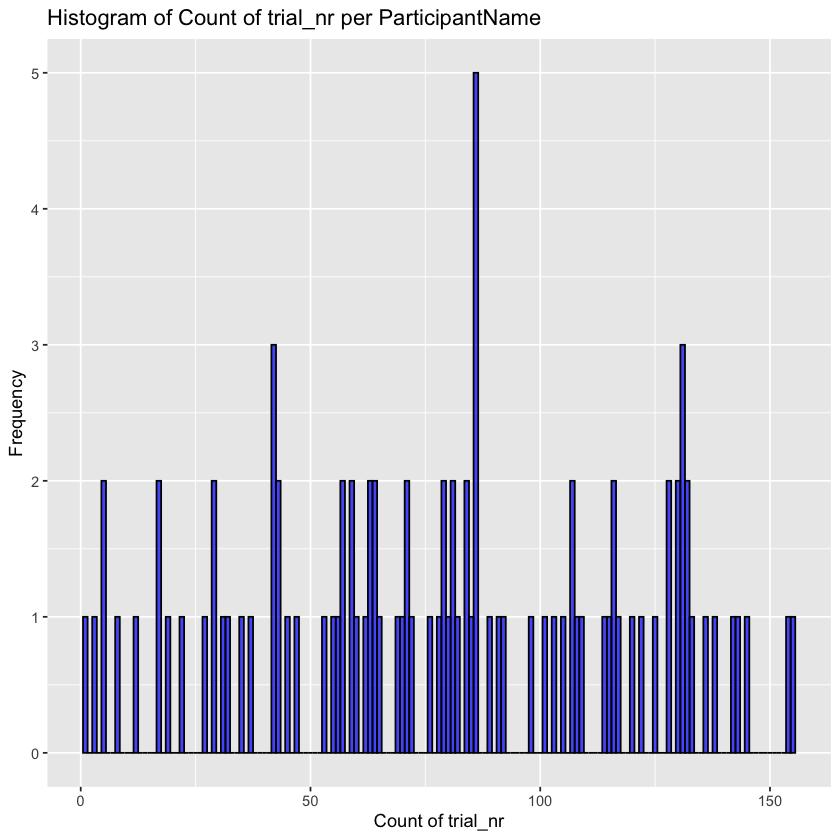

In [12]:
# Histogram for the number of trials per participant
trial_counts <- subset_df %>%
  group_by(ParticipantName) %>%
  summarise(count_trial_nr = n())

histogram_plot <- ggplot(trial_counts, aes(x = count_trial_nr)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black", alpha = 0.7) +
  labs(title = "Histogram of Count of trial_nr per ParticipantName", x = "Count of trial_nr", y = "Frequency") # nolint

print(histogram_plot)


## Main Statistical Analysis

**Analysis formula**:
```r
    lmer(avg_pd_bc_post1500ms ~ C(Emotion) + C(Emotion):Dismissing + C(Emotion):Preoccupied + (1 | ParticipantName) + (1 | trial_nr) + (1 | mean_luminance), data = .)

where

- Emotion is treated as factor
- Dismissing and Preoccupied are continous variables
- Fixed Effects:
    - Emotion
    - Emotion X Dismissing
    - Emotion X Preoccupied
- Random Effects (intercept):
    - ParticipantName
    - mean_luminance
    - trial_nr



In [15]:
result <- subset_df %>%
    lmer(get(DEPENDENT_VARIABLE) ~ C(Emotion) + C(Emotion):Dismissing + C(Emotion):Preoccupied + (1 | ParticipantName) + (1 | trial_nr) + (1 | mean_luminance), data = ., ) # nolint
summary(result)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: get(DEPENDENT_VARIABLE) ~ C(Emotion) + C(Emotion):Dismissing +  
    C(Emotion):Preoccupied + (1 | ParticipantName) + (1 | trial_nr) +  
    (1 | mean_luminance)
   Data: .

REML criterion at convergence: -2303.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.4047 -0.5779  0.0041  0.5983  4.6883 

Random effects:
 Groups          Name        Variance  Std.Dev.
 trial_nr        (Intercept) 0.0002480 0.01575 
 ParticipantName (Intercept) 0.0100661 0.10033 
 mean_luminance  (Intercept) 0.0003379 0.01838 
 Residual                    0.0303595 0.17424 
Number of obs: 3885, groups:  
trial_nr, 228; ParticipantName, 45; mean_luminance, 38

Fixed effects:
                              Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                  2.226e-01  1.908e-02  4.891e+01  11.669 9.66e-16
C(Emotion)sad               -9.153e-04  8.860e-03  4.950e+01  -0.103   0.91

- <span style="color:darkred">**C(Emotion)sad:Dismissing:** The more dismissing, the more the pupil dilates to sad stimuli (p<0.5)</span> 
- <span style="color:darkred">**C(Emotion)happy:Dismissing:** The more dismissing, the more the pupil dilates to happy stimuli (marginally significant)</span> 
- <span style="color:darkred">**C(Emotion)sad:Preoccupied:** Degree of preoccupied does not affect pupil response to sad stimuli (n.s.)</span> 
- <span style="color:darkred">**C(Emotion)happy:Preoccupied:** Degree of preoccupied does not affect pupil response to happy stimuli (n.s.))</span> 

In [16]:
confint(result)

Computing profile confidence intervals ...



,2.5 %,97.5 %
.sig01,0.0000000000,0.02632960
.sig02,0.0788058676,0.12201812
.sig03,0.0103982143,0.02666533
.sigma,0.1702333326,0.17830945
(Intercept),0.1857487875,0.25946490
C(Emotion)sad,-0.0183855462,0.01657707
C(Emotion)happy:Dismissing,0.0007459007,0.03686389
C(Emotion)sad:Dismissing,0.0041547930,0.04041375
C(Emotion)happy:Preoccupied,-0.0109315638,0.01087278
C(Emotion)sad:Preoccupied,-0.0070396494,0.01476164


### ANOVA test on fitted linear mixed effects model

This allows us to get statistical effects at a higher level (e.g., Emotion X Dismissing, Emotion X Preoccupied).
Given the Linear Model, we use ANOVA type 3 Sum of Squares and F-statistic for significance testing.

In [17]:
Anova(result, type = 3, test.statistic = "F")


,F,Df,Df.res,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),136.08538282,1,48.31948,1.169721e-15
C(Emotion),0.01066212,1,47.60103,9.181924e-01
C(Emotion):Dismissing,2.97463497,2,108.13570,5.526087e-02
C(Emotion):Preoccupied,2.16071431,2,107.01333,1.202446e-01


- <span style="color:darkred">**Marginal Significant overall Emotion X Preoccupied interaction effect**: Degree of Dismissing has a stronger positive effect on pupil dilation when the stimulus valence is sad compared to when the stimulus valence is happy (marginally significant)</span> 

### Check Residuals and Cook's Distance


Cook's distance: simple heuristic is to consider observations as highly influential when their distance value is > 1. See also [WIKIPEDIA](https://en.wikipedia.org/wiki/Cook%27s_distance)

5632 5661 
3387 3416

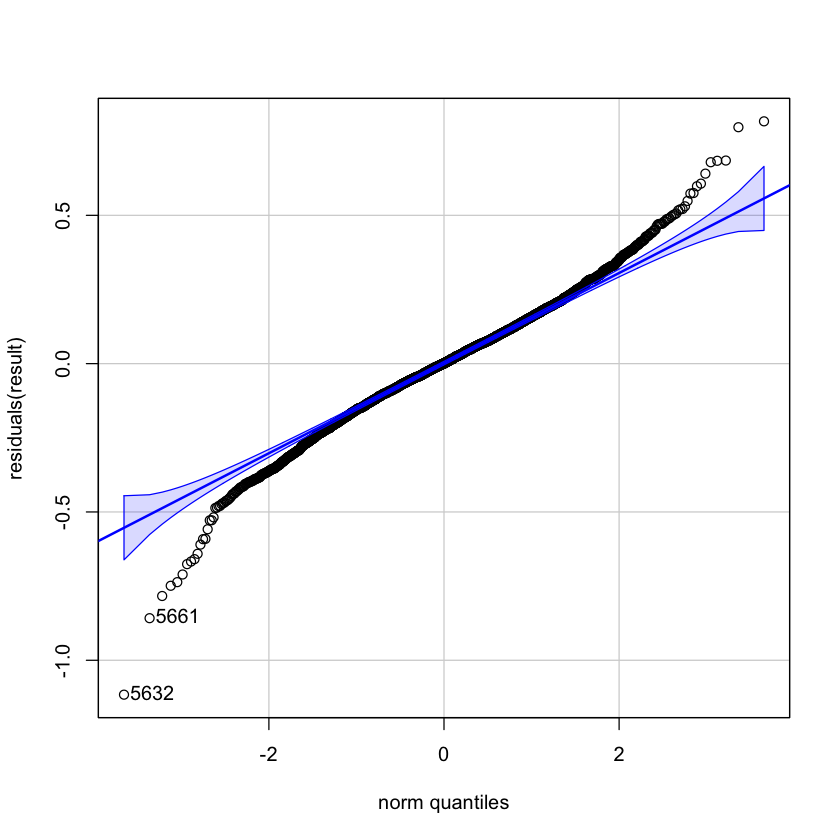

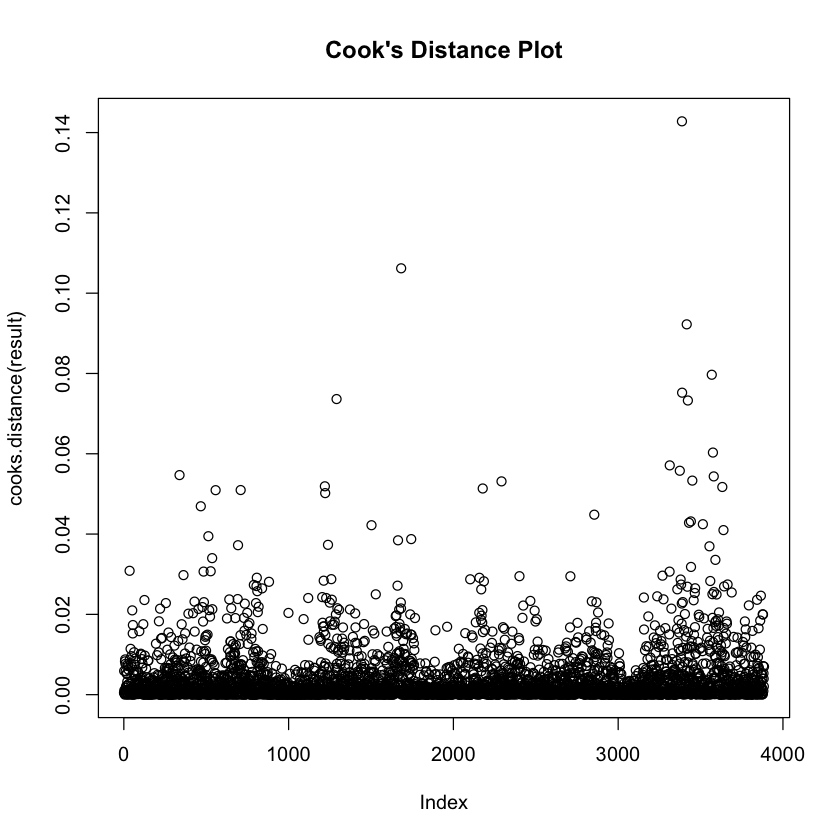

In [18]:
# Normality of Residuals
qqPlot(residuals(result))

# Cook's Distance
plot(cooks.distance(result), main="Cook's Distance Plot")

- <span style="color:darkred">**Looks good to me**</span> 

### Simple Means for Emotion

In [19]:
aggregate(get(DEPENDENT_VARIABLE) ~ Emotion, data = df, mean)


Emotion,get(DEPENDENT_VARIABLE)
<chr>,<dbl>
happy,0.2451325
sad,0.2518532


### Visualize interactions

- Change in pupil dilation for **Dismissing** as a function of Emotion (happy/sad)
- Change in pupil dilation for **Preoccupied** as a function of Emotion (happy/sad)

Resources:  
https://cran.r-project.org/web/packages/sjPlot/vignettes/plot_interactions.html


- <span style="color:blue">**Plots are also exported**</span> 

In [20]:
library(ggplot2) # Make sure to load ggplot2 for theme and geom functions

par(cex = 1.0)
# tiff(file.path(FIGURE_REPORTS_DIR, "Dismissing_int.tiff"), width = 1800, height = 1800, res = 300)
png(file.path(FIGURE_REPORTS_DIR, "Dismissing_int.png"), width = 1800, height = 1800, res = 300)

# Create the plot
p <- plot_model(result,
  type = "pred",
  terms = c("Dismissing", "Emotion"),
  title = "",
  axis.title = c("Change in pupil dilation (in mm)\nrelative to baseline"),
)

# Adjust the theme to explicitly show spines on all sides
update_geom_defaults("line", list(size = 4.5))
p <- p + theme_minimal() +
  theme(
    plot.title = element_text(size = 12, face = "bold", family = "sans"),
    text = element_text(size = 12),
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 12),
    panel.background = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    plot.background = element_blank(),
    axis.line = element_blank(), # Clear default axis lines
    axis.ticks = element_blank() # Clear default ticks
  ) +
  # Manually adding spines for all sides
  geom_segment(aes(x = -Inf, y = Inf, xend = Inf, yend = Inf), color = "black", size = 0.5) + # Top spine
  geom_segment(aes(x = Inf, y = Inf, xend = Inf, yend = -Inf), color = "black", size = 0.5) + # Right spine
  geom_segment(aes(x = -Inf, y = -Inf, xend = Inf, yend = -Inf), color = "black", size = 0.5) + # Bottom spine
  geom_segment(aes(x = -Inf, y = Inf, xend = -Inf, yend = -Inf), color = "black", size = 0.5) + # Left spine +
  # Increase line width directly for all line geoms
  geom_line(size = 1.15) +
  # Set y limits
  ylim(0.00, 0.45)

# Print the plot
print(p)
dev.off()


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


pdf 
  2

In [21]:
par(cex = 1.0)
# tiff(file.path(FIGURE_REPORTS_DIR, "Dismissing_int.tiff"), width = 1800, height = 1800, res = 300)
png(file.path(FIGURE_REPORTS_DIR, "Preoccupied_int.png"), width = 1800, height = 1800, res = 300)

# Create the plot
p <- plot_model(result,
  type = "pred",
  terms = c("Preoccupied", "Emotion"),
  title = "",
  axis.title = c("Change in pupil dilation (in mm)\nrelative to baseline"),
)

# Adjust the theme to explicitly show spines on all sides
update_geom_defaults("line", list(size = 4.5))
p <- p + theme_minimal() +
  theme(
    plot.title = element_text(size = 12, face = "bold", family = "sans"),
    text = element_text(size = 12),
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 12),
    panel.background = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    plot.background = element_blank(),
    axis.line = element_blank(), # Clear default axis lines
    axis.ticks = element_blank() # Clear default ticks
  ) +
  # Manually adding spines for all sides
  geom_segment(aes(x = -Inf, y = Inf, xend = Inf, yend = Inf), color = "black", size = 0.5) + # Top spine
  geom_segment(aes(x = Inf, y = Inf, xend = Inf, yend = -Inf), color = "black", size = 0.5) + # Right spine
  geom_segment(aes(x = -Inf, y = -Inf, xend = Inf, yend = -Inf), color = "black", size = 0.5) + # Bottom spine
  geom_segment(aes(x = -Inf, y = Inf, xend = -Inf, yend = -Inf), color = "black", size = 0.5) + # Left spine +
  # Increase line width directly for all line geoms
  geom_line(size = 1.15) +
  # Set y limits
  ylim(0.0, 0.45)


# Print the plot
print(p)
dev.off()


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


pdf 
  2

## Additional Analyses

### Additional Analysis 1: Age in model

Same model as in Main Analysis but with Age included as fixed effect.

**Analysis formula**:
```r
    lmer(avg_pd_bc_post1500ms ~ C(Emotion) + Age + C(Emotion):Dismissing + C(Emotion):Preoccupied + (1 | ParticipantName) + (1 | trial_nr) + (1 | mean_luminance), data = .)

where

- Emotion is treated as factor
- Dismissing and Preoccupied are continous variables
- Fixed Effects:
    - Emotion
    - Age
    - Emotion X Dismissing
    - Emotion X Preoccupied
- Random Effects (intercept):
    - ParticipantName
    - mean_luminance
    - trial_nr

In [22]:
result_age <- subset_df %>%
    lmer(get(DEPENDENT_VARIABLE) ~ C(Emotion) + Age + C(Emotion):Dismissing + C(Emotion):Preoccupied + (1 | ParticipantName) + (1 | trial_nr) + (1 | mean_luminance), data = ., ) # nolint
summary(result_age)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: get(DEPENDENT_VARIABLE) ~ C(Emotion) + Age + C(Emotion):Dismissing +  
    C(Emotion):Preoccupied + (1 | ParticipantName) + (1 | trial_nr) +  
    (1 | mean_luminance)
   Data: .

REML criterion at convergence: -2295.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.4059 -0.5771  0.0029  0.5984  4.6874 

Random effects:
 Groups          Name        Variance  Std.Dev.
 trial_nr        (Intercept) 0.0002480 0.01575 
 ParticipantName (Intercept) 0.0100623 0.10031 
 mean_luminance  (Intercept) 0.0003384 0.01840 
 Residual                    0.0303597 0.17424 
Number of obs: 3885, groups:  
trial_nr, 228; ParticipantName, 45; mean_luminance, 38

Fixed effects:
                              Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                  0.3312982  0.1125793 40.0356323   2.943  0.00539
C(Emotion)sad               -0.0009233  0.0088630 49.4809434  -0.104 

In [23]:
Anova(result_age, type = 3, test.statistic = "F")


,F,Df,Df.res,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),8.65936474,1,39.66565,0.005412909
C(Emotion),0.01084111,1,47.59176,0.917511156
Age,0.95951689,1,39.44737,0.333278238
C(Emotion):Dismissing,3.32848885,2,105.48036,0.039649513
C(Emotion):Preoccupied,2.10794853,2,104.50446,0.126623225


### Additional Analysis 2: Security (categorical) instead of Dismissing/Preoccupied

Same as in Main Analysis but with Dismissing and Preoccupied replaced with Security(0,1)

**Analysis formula**:
```r
    lmer(avg_pd_bc_post1500ms ~ C(Emotion) + C(Emotion):C(Security) + (1 | ParticipantName) + (1 | trial_nr) + (1 | mean_luminance), data = .)

where

- Emotion is treated as factor
- Dismissing and Preoccupied are continous variables
- Fixed Effects:
    - Emotion
    - Emotion X Security
- Random Effects (intercept):
    - ParticipantName
    - mean_luminance
    - trial_nr

In [24]:
# Check how many participants we have per distinct Security
unique_participants <- subset_df %>%
  group_by(Security) %>%
  summarise(Unique_Participants = n_distinct(ParticipantName))

unique_participants


Security,Unique_Participants
<dbl>,<int>
0,39
1,54
2,2


Exclude Security value = 2 from the dataframe as we only have 2 participants

In [25]:
security_subset_df <- subset_df[subset_df$Security != 2, ]
dim(security_subset_df)


[1] 7308   25

In [26]:
result_security <- security_subset_df %>%
    lmer(get(DEPENDENT_VARIABLE) ~ C(Emotion) + C(Emotion):C(Security) + (1 | ParticipantName) + (1 | trial_nr) + (1 | mean_luminance), data = ., )
summary(result_security)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: get(DEPENDENT_VARIABLE) ~ C(Emotion) + C(Emotion):C(Security) +  
    (1 | ParticipantName) + (1 | trial_nr) + (1 | mean_luminance)
   Data: .

REML criterion at convergence: -4836.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.6258 -0.6027  0.0116  0.6092  4.9100 

Random effects:
 Groups          Name        Variance  Std.Dev.
 trial_nr        (Intercept) 2.194e-05 0.004684
 ParticipantName (Intercept) 1.135e-02 0.106527
 mean_luminance  (Intercept) 3.716e-04 0.019277
 Residual                    2.868e-02 0.169350
Number of obs: 7308, groups:  
trial_nr, 228; ParticipantName, 93; mean_luminance, 38

Fixed effects:
                               Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                    0.264389   0.018416 105.667533  14.357   <2e-16
C(Emotion)sad                  0.008387   0.008684  66.766382   0.966   0.3377
C(Emotion)happy:C(Securi

In [27]:
Anova(result_age, type = 3, test.statistic = "F")


,F,Df,Df.res,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),8.65936474,1,39.66565,0.005412909
C(Emotion),0.01084111,1,47.59176,0.917511156
Age,0.95951689,1,39.44737,0.333278238
C(Emotion):Dismissing,3.32848885,2,105.48036,0.039649513
C(Emotion):Preoccupied,2.10794853,2,104.50446,0.126623225


### Additional Analysis 3: Include Secure for generating plot

Same model as in Main Analysis but with Secure included as fixed effect.

**Analysis formula**:
```r
    lmer(avg_pd_bc_post1500ms ~ C(Emotion) + Age + C(Emotion):Dismissing + C(Emotion):Secure + C(Emotion):Preoccupied + (1 | ParticipantName) + (1 | trial_nr) + (1 | mean_luminance), data = .)

where

- Emotion is treated as factor
- Dismissing and Preoccupied are continous variables
- Fixed Effects:
    - Emotion
    - Age
    - Emotion X Dismissing
    - Emotion X Preoccupied
    - Emotion X Secure
- Random Effects (intercept):
    - ParticipantName
    - mean_luminance
    - trial_nr

In [28]:
result_secure <- subset_df %>%
    lmer(get(DEPENDENT_VARIABLE) ~ C(Emotion) + C(Emotion):Dismissing + C(Emotion):Secure + C(Emotion):Preoccupied + (1 | ParticipantName) + (1 | trial_nr) + (1 | mean_luminance), data = ., ) # nolint
summary(result_secure)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: get(DEPENDENT_VARIABLE) ~ C(Emotion) + C(Emotion):Dismissing +  
    C(Emotion):Secure + C(Emotion):Preoccupied + (1 | ParticipantName) +  
    (1 | trial_nr) + (1 | mean_luminance)
   Data: .

REML criterion at convergence: -1147.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-6.2011 -0.5652 -0.0037  0.5897  4.4583 

Random effects:
 Groups          Name        Variance  Std.Dev.
 trial_nr        (Intercept) 0.0005067 0.02251 
 mean_luminance  (Intercept) 0.0001610 0.01269 
 ParticipantName (Intercept) 0.0109177 0.10449 
 Residual                    0.0321892 0.17941 
Number of obs: 2214, groups:  
trial_nr, 228; mean_luminance, 38; ParticipantName, 25

Fixed effects:
                              Estimate Std. Error         df t value Pr(>|t|)
(Intercept)                  2.042e-01  4.413e-02  2.160e+01   4.628 0.000136
C(Emotion)sad               -9.436e-03  1.577e-02  3.27

In [29]:
par(cex = 1.0)
png(file.path(FIGURE_REPORTS_DIR, "Secure_int_separateModel.png"), width = 1800, height = 1800, res = 300)

# Create the plot
p <- plot_model(result_secure,
  type = "pred",
  terms = c("Secure", "Emotion"),
  title = "",
  axis.title = c("Change in pupil dilation (in mm)\nrelative to baseline"),
)

# Adjust the theme to explicitly show spines on all sides
update_geom_defaults("line", list(size = 4.5))
p <- p + theme_minimal() +
  theme(
    plot.title = element_text(size = 12, face = "bold", family = "sans"),
    text = element_text(size = 12),
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 12),
    panel.background = element_blank(),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    plot.background = element_blank(),
    axis.line = element_blank(), # Clear default axis lines
    axis.ticks = element_blank() # Clear default ticks
  ) +
  # Manually adding spines for all sides
  geom_segment(aes(x = -Inf, y = Inf, xend = Inf, yend = Inf), color = "black", size = 0.5) + # Top spine
  geom_segment(aes(x = Inf, y = Inf, xend = Inf, yend = -Inf), color = "black", size = 0.5) + # Right spine
  geom_segment(aes(x = -Inf, y = -Inf, xend = Inf, yend = -Inf), color = "black", size = 0.5) + # Bottom spine
  geom_segment(aes(x = -Inf, y = Inf, xend = -Inf, yend = -Inf), color = "black", size = 0.5) + # Left spine +
  # Increase line width directly for all line geoms
  geom_line(size = 1.15) + ylim(0, 0.45)
# Set y limits


# Print the plot
print(p)
dev.off()


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


pdf 
  2